In [1]:
import importlib
import numpy as np
import EMUS_func_utils #import the module here, so that it can be reloaded.
importlib.reload(EMUS_func_utils)
from EMUS_func_utils import * # or whatever name you want.

import Hloc_utils #import the module here, so that it can be reloaded.
importlib.reload(Hloc_utils)
from Hloc_utils import Hloc_boxplot,plot 

font = {'family' : 'sans-serif',
        'weight' : 'regular',
        'size'   : 16}
plt.rc('font', **font)
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['savefig.dpi'] = 300

from jax import config
jax.config.update("jax_enable_x64", True)
import itertools
import pickle

/scratch/hz1994/vinla/Figures_data/Fig1/vs_temp_mix_d100_diff_beta/vs_temp_mix/parallel_100/d_100/alpha30_1.00_31_split0.50/states_list.npy
(4000, 100)
/scratch/hz1994/vinla/Figures_data/Fig1/vs_temp_mix_d100_diff_beta/vs_temp_mix/parallel_100/d_100/alpha30_0.80_31_split0.50/states_list.npy
(4000, 100)
/scratch/hz1994/vinla/Figures_data/Fig1/vs_temp_mix_d100_diff_beta/vs_temp_mix/parallel_100/d_100/alpha30_0.50_31_split0.50/states_list.npy
(4000, 100)


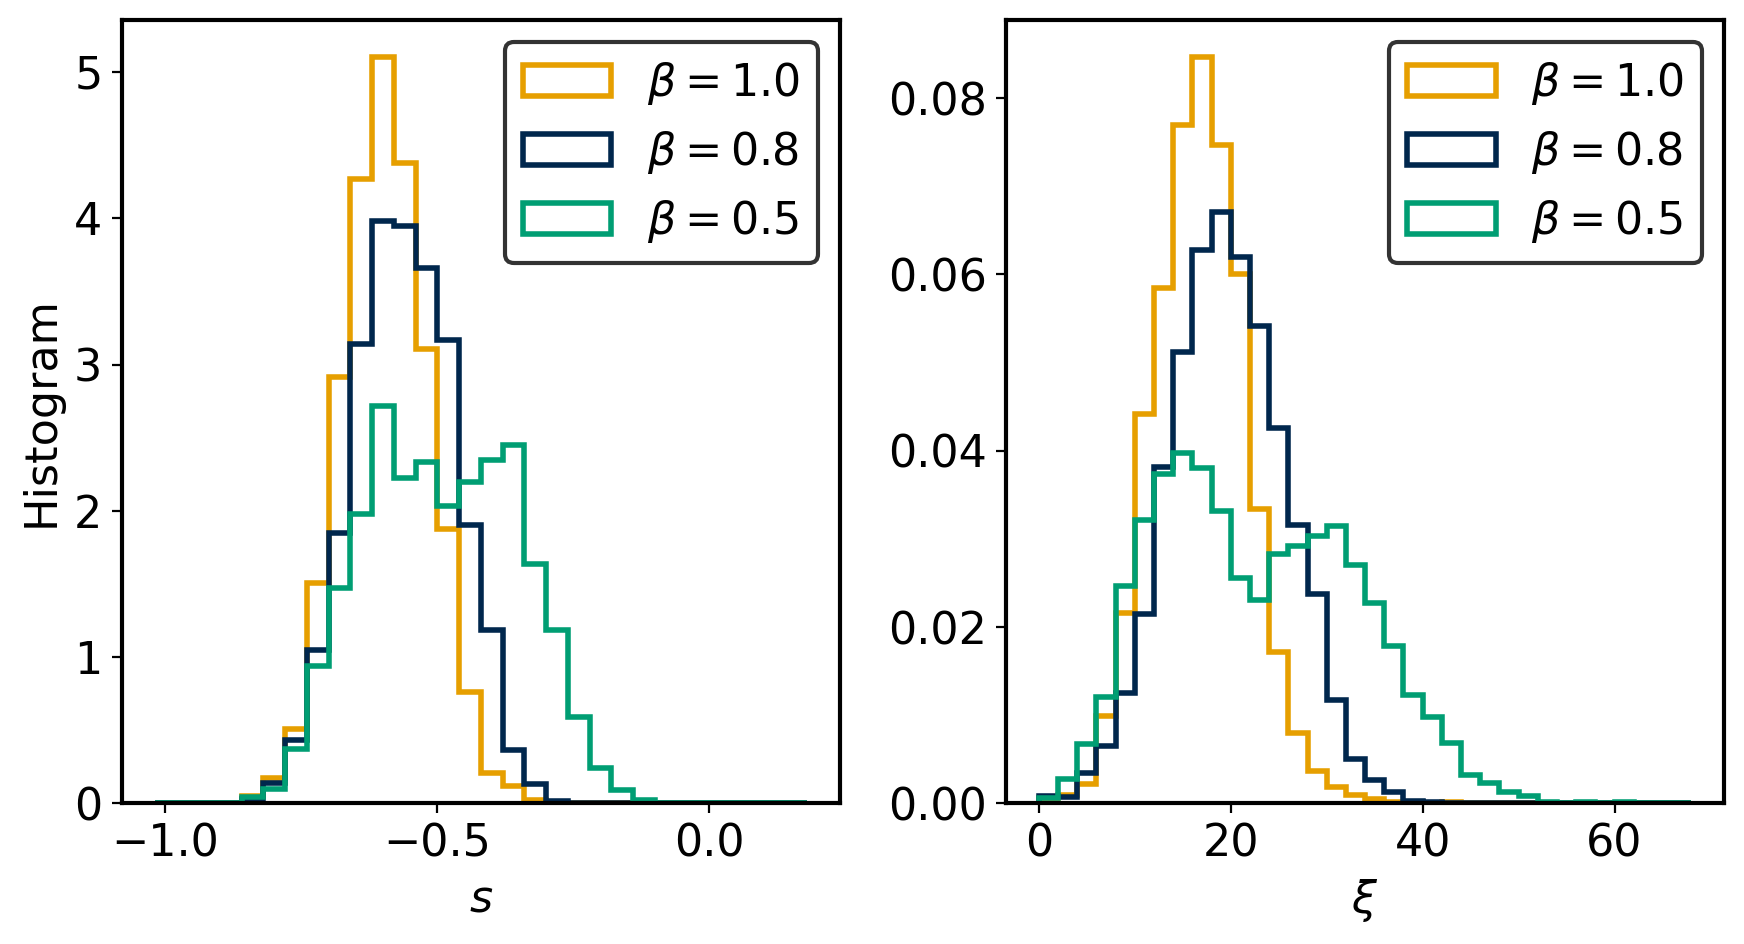

In [2]:
d=100
i=31
alpha=30
iteration=4000
bins_cv=np.arange(-1.02,0.2,0.04)
bins_logpsi2=np.arange(0,70,2)
colors=["#e69f00","#00274d","#009e73"]
# colors=["#d55e00","#0072b2","#009e73"]
fig,ax=plt.subplots(ncols=2,figsize=[9,5],dpi=200)
for t,temp in  enumerate([1.0,0.8,0.5]):  
    E_list=[]
    
    sname=f"/scratch/hz1994/vinla/Figures_data/Fig1/vs_temp_mix_d100_diff_beta/vs_temp_mix/parallel_100/d_100/alpha{alpha}_{temp:.2f}_{i}_split0.50/states_list.npy"
    print(sname)
    states=np.load(sname)[-2:].reshape(-1,d) 
    print(states.shape)
    cvstates=np.array(jcvcompute(states))
    ax[0].hist(cvstates,histtype="step",linewidth=2,color=colors[t], density=True,label= fr"$\beta={temp:.1f}$",bins=bins_cv)

    wname=f"/scratch/hz1994/vinla/Figures_data/Fig1/vs_temp_mix_d100_diff_beta/vs_temp_mix/parallel_100/d_100/alpha{alpha}_{temp:.2f}_{i}_split0.50/w_list.npy"
    w_list=np.load(wname)
    weights=w_list[iteration]
    W0 = jnp.reshape(weights[:-alpha], (alpha, d))
    fftW0 = jnp.fft.fft(W0)
    b0 = jnp.reshape(weights[-alpha:], (alpha, 1))
    store_logx  = np.array(jlogansatz(states, fftW0, b0))
    S=-2*store_logx.real 
    ax[1].hist(S-min(S) ,histtype="step" ,linewidth=2,color=colors[t],label= fr"$\beta={temp:.1f}$",density=True,bins=bins_logpsi2)
leg1=ax[0].legend()
leg2=ax[1].legend()

leg1.get_frame().set_linewidth(1.5)
leg1.get_frame().set_edgecolor('black')
leg2.get_frame().set_linewidth(1.5)
leg2.get_frame().set_edgecolor('black')
# ax[0].set_xlabel(r'$\left\langle\sigma_i \sigma_{i+1}\right\rangle$')
# ax[1].set_xlabel(r'-$\log |\psi_{\theta}|^2$')
ax[0].set_xlabel(r'$s$')
ax[1].set_xlabel(r'$\xi$')
ax[0].set_ylabel('Histogram')
fig.tight_layout()
fig.savefig("Fig1_tempering_hist.png")